In [20]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD, PCA
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity
from sklearn.cluster import KMeans
import seaborn as sns
from IPython.display import display
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
from wordcloud import WordCloud
import matplotlib.cm as cm



## data loading and preprocessing

In [199]:
df = pd.read_csv('../data/loc_pivot_new.csv')
df.moving

0        14.0
1        29.0
2        21.0
3        19.0
4        18.0
         ... 
81369    11.0
81370    19.0
81371    26.0
81372    26.0
81373    14.0
Name: moving, Length: 81374, dtype: float64

In [221]:
df = pd.read_csv('../data/loc_pivot_new.csv')
df.drop('moving', inplace= True, axis= 1)
user_list = df.imsi
df.set_index('imsi', inplace= True)
df.fillna(0, inplace= True)
df = df.astype(int)
print("Raw data shape:", df.shape)
display(df.head())



'''filter out useless feature (Silhouette scroe is better off as opposed including all features)'''
# df = df.loc[:, df.sum() > 10]
tmp = (df.sum() / np.sum(df.sum())).sort_values(ascending=False)
selected_poi = tmp.index[:1000]
df
del tmp

df = df.loc[:, selected_poi]
print("After poi selection data shape:", df.shape)
print(f"unique user count: {len(user_list)} and poi feauture count: {df.shape[1]}")
display(df.head())

scaler = StandardScaler()
standardized_df = pd.DataFrame(scaler.fit_transform(df), columns= df.columns)
standardized_df.index = list(df.index)

print('After standardization')
display(standardized_df.head())

columns = df.columns

doc2vec_df = df.copy()
for c in columns:
    doc2vec_df[c] = doc2vec_df[c].apply(lambda x:c if x> 0 else 'none' )
display(doc2vec_df.head())


Raw data shape: (81374, 44)


,accountant,advertising_agency,architecture,automotive,beauty_health,beauty_personal_care,books,clothing_shoes_jewelry_watches,commuter,designer,...,professional_manager,religious,soho,sports_outdoors,student,telcom,therapist,toy_games,travel,travel_agent
imsi,,,,,,,,,,,,,,,,,,,,,
510011610676080,0,0,0,41,0,0,0,0,0,0,...,0,30,0,7,22,0,0,0,2,0
510014160009649,0,0,0,56,0,0,0,0,0,0,...,0,20,0,40,34,0,0,0,2,0
510011160334410,0,0,0,61,0,0,0,0,0,0,...,0,52,0,6,48,0,0,0,1,0
510011910004217,0,2,0,21,0,0,0,0,0,0,...,0,11,0,5,14,0,0,0,2,0
510017560295232,0,0,0,87,0,0,1,1,4,0,...,0,68,0,69,26,4,0,0,63,0


After poi selection data shape: (81374, 44)
unique user count: 81374 and poi feauture count: 44


,automotive,religious,student,sports_outdoors,medical_profession,travel,food_grocery,genaralized,life_style,franchise_restaurant,...,it,professional_manager,toy_games,energy_supplier,soho,advertising_agency,travel_agent,designer,therapist,food_&grocery
imsi,,,,,,,,,,,,,,,,,,,,,
510011610676080,41,30,22,7,28,2,4,0,0,1,...,0,0,0,0,0,0,0,0,0,0
510014160009649,56,20,34,40,40,2,10,3,2,1,...,0,0,0,0,0,0,0,0,0,0
510011160334410,61,52,48,6,34,1,2,1,2,0,...,0,0,0,0,0,0,0,0,0,0
510011910004217,21,11,14,5,13,2,8,0,0,4,...,0,0,0,0,0,2,0,0,0,0
510017560295232,87,68,26,69,15,63,7,62,5,3,...,0,0,0,0,0,0,0,0,0,0


After standardization


,automotive,religious,student,sports_outdoors,medical_profession,travel,food_grocery,genaralized,life_style,franchise_restaurant,...,it,professional_manager,toy_games,energy_supplier,soho,advertising_agency,travel_agent,designer,therapist,food_&grocery
510011610676080,0.391449,0.920345,0.484072,-0.337156,1.501983,-0.383013,-0.176517,-0.497336,-0.428491,-0.270338,...,-0.073772,-0.072375,-0.061579,-0.057024,-0.066125,-0.048424,-0.030785,-0.018479,-0.015743,-0.012566
510014160009649,1.162988,0.325816,1.249985,2.100383,2.458875,-0.383013,0.406946,-0.143803,-0.167039,-0.270338,...,-0.073772,-0.072375,-0.061579,-0.057024,-0.066125,-0.048424,-0.030785,-0.018479,-0.015743,-0.012566
510011160334410,1.420168,2.228307,2.143551,-0.411021,1.980429,-0.471848,-0.371005,-0.379492,-0.167039,-0.414265,...,-0.073772,-0.072375,-0.061579,-0.057024,-0.066125,-0.048424,-0.030785,-0.018479,-0.015743,-0.012566
510011910004217,-0.637269,-0.209259,-0.026537,-0.484886,0.305869,-0.383013,0.212459,-0.497336,-0.428491,0.161445,...,-0.073772,-0.072375,-0.061579,-0.057024,-0.066125,7.142203,-0.030785,-0.018479,-0.015743,-0.012566
510017560295232,2.757502,3.179552,0.739376,4.242462,0.465351,5.035930,0.115215,6.809016,0.225139,0.017517,...,-0.073772,-0.072375,-0.061579,-0.057024,-0.066125,-0.048424,-0.030785,-0.018479,-0.015743,-0.012566


,automotive,religious,student,sports_outdoors,medical_profession,travel,food_grocery,genaralized,life_style,franchise_restaurant,...,it,professional_manager,toy_games,energy_supplier,soho,advertising_agency,travel_agent,designer,therapist,food_&grocery
imsi,,,,,,,,,,,,,,,,,,,,,
510011610676080,automotive,religious,student,sports_outdoors,medical_profession,travel,food_grocery,none,none,franchise_restaurant,...,none,none,none,none,none,none,none,none,none,none
510014160009649,automotive,religious,student,sports_outdoors,medical_profession,travel,food_grocery,genaralized,life_style,franchise_restaurant,...,none,none,none,none,none,none,none,none,none,none
510011160334410,automotive,religious,student,sports_outdoors,medical_profession,travel,food_grocery,genaralized,life_style,none,...,none,none,none,none,none,none,none,none,none,none
510011910004217,automotive,religious,student,sports_outdoors,medical_profession,travel,food_grocery,none,none,franchise_restaurant,...,none,none,none,none,none,advertising_agency,none,none,none,none
510017560295232,automotive,religious,student,sports_outdoors,medical_profession,travel,food_grocery,genaralized,life_style,franchise_restaurant,...,none,none,none,none,none,none,none,none,none,none


## input vectorize

### pca vectorization

1. __Finding the optimal number of components__

original input shape: (81374, 45)


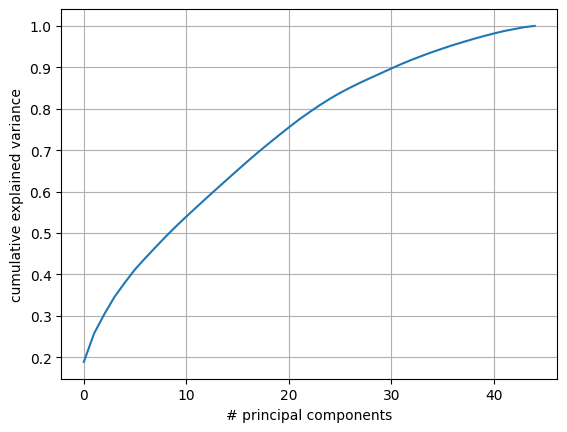

In [42]:
# poi_count_array = df.values

# standardized_df = standardized_df.sample(n= 10000)
poi_count_array = standardized_df.values
# user_list = list(standardized_df.index)
print('original input shape:', poi_count_array.shape)

decomposer = TruncatedSVD(n_components = poi_count_array.shape[1], n_iter = 60)
decomposer.fit(poi_count_array)
cum_explained_var_ratio = np.cumsum(decomposer.explained_variance_ratio_)
del decomposer

plt.plot(cum_explained_var_ratio)
plt.xlabel('# principal components')
plt.ylabel('cumulative explained variance')
plt.grid()


2. __Use 30 as number of components for fitting (explained 80~90 percent of variance)__

In [99]:
NUM_PCA = 30

decomposer = TruncatedSVD(n_components = NUM_PCA, n_iter = 60)
decomposer.fit(poi_count_array)

print('total explained variance ratio: ', np.sum(decomposer.explained_variance_ratio_))
pca_vectors = decomposer.transform(poi_count_array)
print('vectorized shape:', pca_vectors.shape)
poi_to_pca_vector = decomposer.components_.T
print('poi to pca vector shape:', poi_to_pca_vector.shape)


total explained variance ratio:  0.8860014120671731
vectorized shape: (81374, 30)
poi to pca vector shape: (45, 30)


3. __Vector explanation__

In [30]:

# user_similarity_df = pd.DataFrame(cosine_similarity(pca_vectors.astype(np.float32)), columns=user_list)
# user_similarity_df.index = list(user_list)
# top_num = 10
# user_to_see = 510019310255406
# print("target imsi:", user_to_see)

# most_similar = list(user_similarity_df[user_similarity_df.index == user_to_see].T.sort_values(by = user_to_see, ascending= False).head(top_num+1).index)[1:]
# print(f'top {top_num} most similar:', most_similar)
# reverse_similar = list(user_similarity_df[user_similarity_df.index == user_to_see].T.sort_values(by = user_to_see, ascending= False).tail(top_num).index)
# print(f'top {top_num} reverse similar:', reverse_similar)


In [147]:
poi_similarity_df = pd.DataFrame(cosine_similarity(poi_to_pca_vector), columns=columns)
poi_similarity_df.index = list(columns)
top_num = 10
poi_to_see = "sports_outdoors"

print("target poi:", poi_to_see)
most_similar = list(poi_similarity_df[poi_similarity_df.index == poi_to_see].T.sort_values(by = poi_to_see, ascending= False).head(top_num + 1).index)[1:]
print(f'top {top_num} most similar:', most_similar)
reverse_similar = list(poi_similarity_df[poi_similarity_df.index == poi_to_see].T.sort_values(by = poi_to_see, ascending= False).tail(top_num).index)
print(f'top {top_num} reverse similar:', reverse_similar)


target poi: sports_outdoors
top 10 most similar: ['automotive', 'official', 'religious', 'student', 'clothing_shoes_jewelry_watches', 'education', 'others', 'law_service', 'night_life', 'books']
top 10 reverse similar: ['accountant', 'professional_manager', 'ngo', 'architecture', 'beauty_personal_care', 'franchise_restaurant', 'medical_profession', 'life_style', 'food_grocery', 'telcom']


In [45]:
similar_poi = model.wv.most_similar(poi_to_see)
display(similar_poi)

reverse_similar_poi = model.wv.most_similar(negative= poi_to_see,  topn= 10)
display(reverse_similar_poi)

NameError: name 'model' is not defined

In [219]:
df_pc = pd.DataFrame(poi_to_pca_vector, columns= [f'pc{i}' for i in range(1, NUM_PCA + 1)])
# df_pc = abs(df_pc)
df_pc.index = list(columns)
df_pc.sort_values(by= 'pc3', ascending= False).T.style\
    .background_gradient(cmap='bwr_r', axis= None)\
    .format("{:.2}")

# travel	life_style	food_grocery	franchise_restaurant	official	genaralized
# accountant	architecture	financial	beauty_personal_care	clothing_shoes_jewelry_watches
# night_life	ngo	industrial_scientific	home_garden_tools	telcom
# books	clothing_shoes_jewelry_watches	grocery	genaralized	franchise_restaurant
# it	beauty_personal_care	soho	professional_manager	household	industrial_scientific

,night_life,ngo,industrial_scientific,home_garden_tools,telcom,household,electronics,life_style,professional_manager,official,franchise_restaurant,travel,others,movies_music_games,books,toy_games,moving,beauty_health,commuter,clothing_shoes_jewelry_watches,therapist,genaralized,food_&grocery,designer,energy_supplier,insurance,law_service,travel_agent,soho,education,pet_supplies,food_grocery,grocery,advertising_agency,it,beauty_personal_care,media,financial,architecture,accountant,sports_outdoors,medical_profession,automotive,religious,student
pc1,0.18,0.13,0.17,0.23,0.17,0.12,0.14,0.27,0.04,0.24,0.25,0.27,0.23,0.051,0.098,0.015,0.044,0.03,0.11,0.16,-0.00034,0.23,2.9e-05,0.0056,0.0027,0.056,0.092,0.0092,0.047,0.18,0.071,0.25,0.14,0.012,0.051,0.086,0.062,0.13,0.11,0.11,0.2,0.19,0.19,0.22,0.2
pc2,-0.073,-0.087,-0.09,0.086,-0.032,-0.088,0.0036,0.048,-0.0064,0.049,0.076,-0.066,0.0041,-0.055,0.013,-0.002,-0.0051,-0.0034,-0.058,0.17,-0.0032,0.042,0.002,-0.01,-0.0038,-0.023,0.12,-0.02,0.064,0.17,-0.013,-0.12,0.063,-0.028,0.14,0.24,-0.067,0.4,0.42,0.44,-0.13,-0.24,-0.19,-0.24,-0.24
pc3,0.29,0.29,0.27,0.24,0.2,0.2,0.18,0.14,0.12,0.1,0.088,0.05,0.049,0.041,0.028,0.028,0.024,0.0021,0.0016,0.0013,-0.0011,-0.0012,-0.0019,-0.0034,-0.011,-0.015,-0.017,-0.023,-0.024,-0.034,-0.034,-0.037,-0.038,-0.039,-0.081,-0.083,-0.095,-0.15,-0.17,-0.18,-0.28,-0.28,-0.29,-0.29,-0.3
pc4,-0.073,-0.23,-0.087,-0.12,-0.22,-0.13,0.049,0.078,0.036,-0.043,0.17,-0.0028,-0.091,0.041,0.44,0.11,-0.0089,0.1,0.11,0.4,-0.00059,0.2,0.011,-0.0051,7.9e-05,0.048,-0.041,-0.024,0.067,-0.14,0.12,0.019,0.4,-0.0073,0.12,0.11,-0.055,-0.16,-0.21,-0.22,0.032,-0.085,-0.047,-0.1,-0.11
pc5,0.051,0.023,0.08,-0.021,0.049,0.092,-0.0083,0.046,0.12,-0.078,-0.02,-0.045,0.032,-0.15,-0.24,-0.082,-0.022,-0.024,-0.16,-0.12,0.0086,-0.012,0.0088,0.013,-0.022,-0.15,0.014,0.02,0.33,-0.095,-0.13,0.031,0.067,-0.031,0.58,0.51,0.021,-0.17,-0.11,-0.1,-0.058,0.021,0.033,0.035,0.055
pc6,-0.087,0.054,-0.17,-0.11,0.16,-0.2,-0.15,-0.071,-0.26,0.18,0.063,0.1,0.12,0.52,-0.039,-0.068,0.086,-0.12,0.52,-0.058,-0.026,-0.03,-0.025,-0.026,0.07,-0.084,0.12,-0.053,0.1,-0.053,-0.11,0.094,-0.16,-0.063,0.13,0.12,0.058,-0.075,-0.041,-0.034,-0.061,-0.1,-0.058,-0.059,-0.041
pc7,-0.11,0.15,0.07,0.17,0.11,-0.13,0.33,-0.033,-0.37,-0.15,0.0047,-0.078,-0.16,0.14,0.0086,0.3,-0.085,0.25,-0.1,0.018,-0.066,-0.19,-0.039,0.039,0.015,0.31,0.22,-0.061,-0.052,-0.11,0.062,0.0042,-0.11,0.2,0.13,0.14,-0.29,0.043,-0.024,-0.029,-0.047,0.049,0.049,0.07,0.095
pc8,-0.009,-0.1,0.14,-0.0094,-0.11,0.25,-0.011,-0.04,0.47,-0.11,0.038,-0.083,-0.24,0.43,-0.11,0.059,-0.09,0.34,0.23,-0.081,0.11,-0.043,0.061,0.051,0.092,-0.18,0.088,0.13,0.019,-0.034,-0.0028,0.0046,0.058,-0.087,-0.044,-0.011,-0.27,0.065,0.091,0.092,-0.029,0.036,0.083,0.034,0.069
pc9,0.076,-0.088,-0.019,-0.082,-0.28,0.091,0.16,-0.047,0.14,0.1,-0.022,0.0068,0.087,0.099,-0.046,0.034,-0.035,0.0087,0.18,-0.18,0.029,-0.022,0.0084,-0.022,-0.095,0.43,-0.44,0.023,0.2,0.17,0.28,0.084,-0.2,0.32,0.13,0.053,0.096,0.085,-0.012,0.00087,-0.048,-0.018,-0.093,-0.063,-0.037
pc10,0.12,-0.01,-0.064,-0.0023,-0.055,0.043,-0.078,0.034,0.043,-0.055,0.12,0.024,-0.18,0.036,0.027,-0.28,-0.11,-0.37,0.032,0.00048,0.04,0.091,-0.026,-0.089,-0.071,0.24,0.034,0.048,-0.12,0.069,-0.51,0.022,0.1,0.39,0.0042,-0.011,-0.39,-0.065,0.02,0.021,0.013,0.019,0.045,0.0078,0.021


In [45]:
df_pc = pd.DataFrame(poi_to_pca_vector, columns= [f'pc{i}' for i in range(1, NUM_PCA + 1)])
# df_pc = abs(df_pc)
df_pc.index = list(columns)
df_pc.sort_values(by= 'pc2', ascending= False).T.style\
    .background_gradient(cmap='bwr_r', axis= None)\
    .format("{:.2}")

	# automotive	religious	student	moving	sports_outdoors	medical_profession
    # travel	religious	food_grocery	medical_profession	student life_style
    # travel	moving	genaralized	life_style	official	franchise_restaurant food_grocery

,travel,religious,food_grocery,medical_profession,student,life_style,genaralized,official,others,franchise_restaurant,sports_outdoors,home_garden_tools,night_life,telcom,industrial_scientific,education,clothing_shoes_jewelry_watches,ngo,electronics,grocery,household,commuter,books,law_service,financial,media,pet_supplies,accountant,architecture,beauty_personal_care,insurance,movies_music_games,it,soho,professional_manager,beauty_health,travel_agent,advertising_agency,designer,therapist,food_&grocery,toy_games,energy_supplier,automotive,moving
pc1,0.16,0.36,0.15,0.23,0.34,0.085,0.1,0.073,0.073,0.074,0.27,0.041,0.029,0.027,0.025,0.016,0.014,0.012,0.014,0.044,0.014,0.018,0.0077,0.0084,0.0041,0.0051,0.0056,0.0025,0.0027,0.003,0.0038,0.004,0.0017,0.00073,0.0015,0.0023,0.00026,0.00032,0.00012,4.5e-05,3e-05,0.00076,0.00062,0.67,0.31
pc2,0.32,0.31,0.27,0.22,0.21,0.2,0.17,0.17,0.16,0.16,0.14,0.11,0.077,0.067,0.058,0.048,0.036,0.033,0.032,0.031,0.029,0.029,0.016,0.013,0.013,0.013,0.0081,0.0075,0.0074,0.0068,0.0067,0.0051,0.0027,0.0017,0.0014,0.0011,0.00035,0.00029,9.4e-05,-3.1e-05,-0.00011,-0.00023,-0.00075,-0.45,-0.48
pc3,0.34,-0.37,0.19,-0.26,-0.4,0.26,0.28,0.26,0.18,0.23,0.057,0.15,0.098,0.067,0.052,0.051,0.073,0.034,0.045,0.099,0.023,0.042,0.032,0.024,0.024,0.0017,0.0073,0.019,0.019,0.016,0.0027,0.0065,0.006,0.0025,0.006,0.00059,-0.0006,-0.00038,-0.00028,5.5e-06,4.5e-05,0.00068,0.00027,0.0068,0.34
pc4,-0.013,-0.21,-0.059,-0.2,-0.21,0.00062,0.058,0.03,-0.0096,0.015,0.28,-0.0055,-0.014,-0.031,-0.024,0.0038,0.022,-0.009,-9.1e-05,0.041,-0.0048,-7.3e-05,0.0075,0.0039,0.0057,-0.0056,0.00078,0.0057,0.0056,0.0021,-0.0022,-0.0038,0.0016,-0.00026,0.0017,-0.00054,-0.00061,-0.00025,-0.00029,-9.4e-05,8.4e-05,0.00048,0.00056,0.51,-0.72
pc5,0.13,0.018,0.07,-0.09,0.16,0.087,-0.024,0.077,0.057,0.078,-0.88,0.099,0.075,0.092,0.065,-0.0003,-0.017,0.039,0.027,-0.0067,0.021,0.0098,-0.0099,0.0017,0.00065,-0.0045,-0.0054,0.00034,0.0031,0.0097,0.00069,0.012,0.0027,0.0017,0.0031,-0.0013,0.00061,-0.00045,0.00039,0.0001,0.00018,0.00025,-0.00087,0.28,-0.19
pc6,-0.024,-0.37,0.28,0.79,-0.25,0.0019,0.086,-0.17,-0.15,-0.014,-0.11,-0.035,0.022,-0.037,0.026,-0.0062,-0.017,-0.029,0.0027,0.056,-0.014,-0.0045,0.0082,-0.021,-0.013,-0.0031,0.0023,-0.012,-0.015,-0.0044,0.0022,-0.0036,-0.0027,-0.0012,0.0032,0.0045,0.00075,0.00093,7.8e-05,0.00049,0.00015,-0.00079,-0.00055,0.088,-0.044
pc7,0.049,-0.66,0.12,-0.078,0.71,-0.056,-0.089,0.042,0.016,-0.0074,0.13,-0.028,0.016,0.024,0.025,0.011,-0.018,0.0055,-0.0067,-0.016,-0.0082,0.023,0.0072,-0.017,-0.0025,-0.00025,-0.0037,-0.0016,0.00098,0.0045,0.0047,0.014,0.0022,0.0015,-0.001,-0.00044,-0.00033,0.00015,1.9e-06,-6.2e-05,0.00029,0.0018,0.00034,-0.06,-0.0032
pc8,-0.41,0.0062,-0.21,-0.032,0.2,0.17,0.59,-0.12,-0.21,0.32,-0.073,0.0043,-0.0058,-0.11,-0.025,0.011,0.14,-0.095,0.037,0.4,-0.011,-0.031,0.061,0.018,0.018,-0.026,0.00051,0.017,0.02,0.03,-0.002,-0.017,0.016,0.0014,0.014,0.009,0.00013,-0.00051,0.00042,-0.00024,0.00013,0.003,2.1e-05,-0.052,-0.0013
pc9,-0.28,0.13,0.8,-0.33,-0.039,0.065,-0.14,-0.17,-0.28,0.08,0.02,-0.061,-0.0018,-0.066,0.019,-0.0071,-0.02,-0.041,0.021,0.033,-0.013,0.017,0.0031,0.0053,-0.022,-0.011,0.0022,-0.016,-0.017,0.012,-0.00051,0.023,0.0069,0.00083,-0.0043,0.0061,0.0015,0.0011,-0.00021,-0.00018,0.00038,0.0017,-0.0019,-0.00048,0.0052
pc10,0.67,0.041,-0.024,-0.16,0.031,-0.19,0.2,-0.5,-0.34,-0.095,-0.028,-0.16,-0.053,-0.094,-0.066,-0.064,0.011,-0.063,-0.028,0.13,-0.049,0.024,0.029,-0.017,-0.035,-0.009,-0.017,-0.025,-0.024,-0.015,-0.0034,0.0064,-0.0065,-0.0014,-0.00076,-0.0016,-0.00065,0.00056,-0.0011,0.00046,-1.9e-06,0.0011,0.0001,-0.022,0.0029


### doc2vec vectorization

In [185]:
tmp = doc2vec_df.astype(str).values
doc2vec_input = []
for index, value in enumerate(tmp):
    doc2vec_input.append(list(filter(lambda x : x != 'non', value)))
del tmp


1. __Fitting doc2vec model (with 50 vector size)__

In [48]:
imsi_tag =  list(doc2vec_df.index)
tagged_data = [TaggedDocument(words= _d, tags=[str(imsi_tag[i])]) for i, _d in enumerate(doc2vec_input)]

model = Doc2Vec(vector_size=100, min_count=1, epochs=80, workers= 10)
model.build_vocab(tagged_data)


def vec_for_learning(model, tagged_docs):
    targets, regressors = zip(*[(doc[1], model.infer_vector(np.array(doc[0], dtype= str))) for doc in tagged_docs])
    return np.array(regressors), targets 

In [187]:
doc2vec_vectors, _ = vec_for_learning(model, tagged_data)
print('vectorized shape', doc2vec_vectors.shape)

vectorized shape (81374, 100)


2. __Vector explanation__

In [70]:
# model.wv.key_to_index

In [171]:
doc2vec_df[doc2vec_df.index.isin([510019310255406, 510011960208403, 510011660273742, 510011060189805])].T


imsi,510011960208403,510011060189805,510019310255406,510011660273742
automotive,automotive,automotive,automotive,automotive
moving,moving,moving,moving,moving
religious,0,religious,religious,religious
student,student,0,student,student
sports_outdoors,0,0,sports_outdoors,sports_outdoors
medical_profession,medical_profession,0,medical_profession,medical_profession
travel,0,0,travel,travel
food_grocery,food_grocery,food_grocery,food_grocery,food_grocery
genaralized,0,genaralized,genaralized,genaralized
life_style,life_style,0,life_style,life_style


In [170]:
model.dv.most_similar(negative='510019310255406')

[('510011060189805', 0.41350844502449036),
 ('510018860286225', 0.40350016951560974),
 ('510017760297424', 0.39437517523765564),
 ('510018310445158', 0.3917507529258728),
 ('510014210015512', 0.38906532526016235),
 ('510017960325365', 0.37923482060432434),
 ('510014210007949', 0.37535443902015686),
 ('510018810421737', 0.3724832832813263),
 ('510017960313065', 0.37050870060920715),
 ('510018710421471', 0.36733174324035645)]

In [50]:
similar_doc = model.dv.most_similar('510019310255406')

display(similar_doc)

poi = "night_life"
similar_poi = model.wv.most_similar(poi)
display(similar_poi)

reverse_similar_poi = model.wv.most_similar(negative=poi,  topn= 10)
display(reverse_similar_poi)

# model.wv['moving:moving']
# model.wv.key_to_index


[('510011960208403', 0.43870609998703003),
 ('510011660273742', 0.42412713170051575),
 ('510019510270807', 0.38517799973487854),
 ('510018810487766', 0.3843224048614502),
 ('510017160333130', 0.37037360668182373),
 ('510018660632177', 0.36925339698791504),
 ('510018960292280', 0.36866170167922974),
 ('510018110377755', 0.36456412076950073),
 ('510018610010040', 0.3645610213279724),
 ('510011460251152', 0.36123713850975037)]

[('moving', 0.21883949637413025),
 ('travel', 0.1747603565454483),
 ('food_grocery', 0.16378773748874664),
 ('food_&grocery', 0.14398398995399475),
 ('financial', 0.1420435607433319),
 ('religious', 0.10852649062871933),
 ('education', 0.10757598280906677),
 ('toy_games', 0.10484913736581802),
 ('architecture', 0.09880394488573074),
 ('media', 0.09036577492952347)]

[('student', 0.2607899010181427),
 ('law_service', 0.19313789904117584),
 ('commuter', 0.1490294635295868),
 ('grocery', 0.148494690656662),
 ('pet_supplies', 0.14748309552669525),
 ('genaralized', 0.1207052618265152),
 ('others', 0.116366446018219),
 ('energy_supplier', 0.0751514658331871),
 ('designer', 0.07206033915281296),
 ('clothing_shoes_jewelry_watches', 0.057681430131196976)]

## Unsupervised modeling

1. __Decide number of k__

In [66]:
range_n_clusters = [i for i in range(2, 10)]

def decide_num_kmean(range_n_clusters, vector):
    for n_clusters in range_n_clusters:
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters= n_clusters, random_state=0, n_init="auto").fit(vector)
        cluster_labels= clusterer.labels_

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(pca_vectors, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

decide_num_kmean(range_n_clusters, pca_vectors)
decide_num_kmean(range_n_clusters, doc2vec_vectors)

    

2. __fitting unsupervised model (with k set to 3)__

In [207]:
tmp = pd.DataFrame(poi_to_pca_vector, columns= [i for i in range(1, 31)])
tmp.index = columns


In [208]:
# kmeans = KMeans(n_clusters= 10, random_state=0, n_init="auto").fit(pca_vectors)
kmeans = KMeans(n_clusters= 10, random_state=0, n_init="auto").fit(tmp)

kmean_labels = kmeans.labels_
tmp['zzz'] = kmean_labels


In [217]:
# tmp.query('zzz == 1').style\
#     .background_gradient(cmap='bwr_r', axis= 1)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,zzz
movies_music_games,0.051261,-0.054569,0.040575,0.040537,-0.152167,0.516481,0.140147,0.428133,0.098842,0.036238,0.018575,0.065783,0.071614,0.075129,-0.096490,0.043208,-0.009071,0.051990,0.065748,-0.077964,0.012937,-0.075401,0.133651,-0.010463,-0.402065,-0.075740,0.059566,0.157633,-0.239285,-0.081505,1


In [210]:
tmp.query('zzz == 1')

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,zzz
movies_music_games,0.051261,-0.054569,0.040575,0.040537,-0.152167,0.516481,0.140147,0.428133,0.098842,0.036238,...,-0.075401,0.133651,-0.010463,-0.402065,-0.07574,0.059566,0.157633,-0.239285,-0.081505,1


In [196]:
kmean_labels = kmeans.labels_
standardized_df['pca_label'] = kmean_labels
standardized_df.query('pca_label == 5').sample(30).style\
    .background_gradient(cmap='bwr_r', axis= 1)


,automotive,moving,religious,student,sports_outdoors,medical_profession,travel,food_grocery,genaralized,life_style,franchise_restaurant,official,others,grocery,home_garden_tools,night_life,telcom,industrial_scientific,commuter,electronics,clothing_shoes_jewelry_watches,education,household,ngo,law_service,books,pet_supplies,movies_music_games,media,financial,insurance,beauty_personal_care,beauty_health,architecture,accountant,it,professional_manager,toy_games,energy_supplier,soho,advertising_agency,travel_agent,designer,therapist,food_&grocery,pca_label
510018760839385,1.265860,0.428906,0.860892,1.888246,0.549222,-0.730763,-0.560683,0.115215,-0.497336,0.094413,-0.414265,-0.352587,-0.377638,2.117642,-0.281237,-0.248533,-0.226633,-0.241927,-0.242474,-0.208016,-0.190793,-0.192780,-0.181786,-0.149136,-0.147168,-0.152728,1.805883,-0.118787,-0.100381,-0.106414,-0.109986,-0.097387,-0.102202,-0.082633,-0.079350,-0.073772,-0.072375,-0.061579,-0.057024,-0.066125,-0.048424,-0.030785,-0.018479,-0.015743,-0.012566,5
510011010009062,0.494321,-0.270195,1.514873,1.377637,-0.115562,1.342501,0.061163,-0.468249,-0.379492,-0.297765,-0.270338,-0.352587,-0.237404,0.574779,-0.281237,-0.017474,-0.226633,-0.241927,-0.242474,0.159206,-0.190793,-0.192780,0.183194,-0.149136,-0.147168,-0.152728,-0.146119,-0.118787,-0.100381,-0.106414,-0.109986,-0.097387,-0.102202,-0.082633,-0.079350,-0.073772,-0.072375,-0.061579,-0.057024,-0.066125,-0.048424,-0.030785,-0.018479,-0.015743,-0.012566,5
510018610003732,0.442885,0.661940,1.039250,1.760594,0.623086,1.581724,1.127184,1.768361,-0.497336,-0.297765,2.608214,-0.090732,-0.097171,-0.389510,-0.092565,0.675702,-0.226633,-0.241927,-0.242474,-0.208016,-0.190793,-0.192780,-0.181786,0.223653,-0.147168,-0.152728,-0.146119,-0.118787,-0.100381,-0.106414,-0.109986,-0.097387,-0.102202,-0.082633,-0.079350,-0.073772,-0.072375,-0.061579,-0.057024,-0.066125,-0.048424,-0.030785,-0.018479,-0.015743,-0.012566,5
510017560641103,0.442885,-1.435363,1.633779,1.696768,-0.337156,-0.491541,-0.294177,0.017971,-0.379492,-0.036313,-0.414265,-0.090732,-0.237404,-0.389510,-0.281237,-0.248533,-0.226633,-0.241927,-0.242474,-0.208016,-0.190793,-0.192780,0.183194,-0.149136,-0.147168,-0.152728,-0.146119,-0.118787,-0.100381,-0.106414,-0.109986,-0.097387,-0.102202,-0.082633,-0.079350,-0.073772,-0.072375,-0.061579,-0.057024,-0.066125,-0.048424,-0.030785,-0.018479,-0.015743,-0.012566,5
510017760296710,1.883091,0.661940,0.266364,1.186159,2.691301,1.501983,-0.027672,-0.468249,-0.379492,-0.428491,1.744649,-0.352587,-0.377638,1.731926,-0.281237,-0.248533,-0.226633,-0.241927,-0.242474,-0.208016,-0.190793,-0.192780,-0.181786,-0.149136,-0.147168,0.337745,-0.146119,-0.118787,-0.100381,-0.106414,-0.109986,-0.097387,-0.102202,-0.082633,-0.079350,-0.073772,-0.072375,-0.061579,-0.057024,-0.066125,-0.048424,-0.030785,-0.018479,-0.015743,-0.012566,5
510018010352689,1.265860,-0.852779,2.525571,0.675550,0.549222,1.422242,-0.560683,-0.079273,1.623863,-0.036313,-0.414265,-0.352587,2.146562,3.660504,-0.281237,-0.248533,-0.226633,0.028537,-0.242474,0.526429,-0.190793,-0.192780,-0.181786,-0.149136,-0.147168,-0.152728,-0.146119,-0.118787,-0.100381,-0.106414,-0.109986,-0.097387,-0.102202,-0.082633,-0.079350,-0.073772,-0.072375,-0.061579,-0.057024,-0.066125,-0.048424,-0.030785,-0.018479,-0.015743,-0.012566,5
510016810874946,0.905809,0.661940,-0.447070,1.058507,1.140140,-0.252318,0.327668,0.212459,-0.025959,-0.428491,-0.414265,-0.352587,0.463762,-0.003794,-0.281237,-0.248533,-0.226633,0.299002,-0.242474,-0.208016,-0.190793,0.163920,-0.181786,-0.149136,-0.147168,-0.152728,-0.146119,-0.118787,-0.100381,-0.106414,-0.109986,-0.097387,1.755841,-0.082633,-0.079350,0.946648,-0.072375,-0.061579,-0.057024,-0.066125,-0.048424,-0.030785,-0.018479,-0.015743,-0.012566,5
510019910465544,0.340014,-0.969296,1.217609,1.569116,0.770816,0.545092,-0.560683,-0.176517,-0.497336,-0.428491,-0.126410,-0.352587,-0.237404,0.381921,-0.281237,-0.248533,-0.226633,-0.241927,-0.242474,-0.208016,-0.190793,-0.19278

In [192]:
kmean_labels = kmeans.labels_
standardized_df['pca_label'] = kmean_labels
standardized_df.query('pca_label == 0').sample(30).style\
    .background_gradient(cmap='bwr_r', axis= 1)


,automotive,moving,religious,student,sports_outdoors,medical_profession,travel,food_grocery,genaralized,life_style,franchise_restaurant,official,others,grocery,home_garden_tools,night_life,telcom,industrial_scientific,commuter,electronics,clothing_shoes_jewelry_watches,education,household,ngo,law_service,books,pet_supplies,movies_music_games,media,financial,insurance,beauty_personal_care,beauty_health,architecture,accountant,it,professional_manager,toy_games,energy_supplier,soho,advertising_agency,travel_agent,designer,therapist,food_&grocery,pca_label
510011610671738,0.545757,1.710591,1.693232,1.186159,1.435599,1.820947,0.505339,0.309703,0.327574,0.486592,-0.126410,3.837093,4.250062,-0.389510,-0.092565,1.368878,0.012065,0.028537,0.076794,0.159206,0.160775,0.520619,-0.181786,-0.149136,-0.147168,-0.152728,0.504548,-0.118787,17.930031,0.605997,0.649649,-0.097387,-0.102202,-0.082633,-0.079350,-0.073772,-0.072375,-0.061579,-0.057024,-0.066125,-0.048424,-0.030785,-0.018479,-0.015743,-0.012566,0
510010160645068,0.957245,0.079356,2.168854,2.143551,-0.041697,1.980429,2.726217,4.102215,-0.025959,-0.036313,-0.270338,-0.352587,-0.377638,-0.196652,-0.281237,0.213585,0.489461,0.028537,-0.242474,-0.208016,-0.190793,0.163920,-0.181786,-0.149136,-0.147168,-0.152728,-0.146119,-0.118787,17.308293,-0.106414,-0.109986,-0.097387,-0.102202,-0.082633,-0.079350,-0.073772,-0.072375,-0.061579,-0.057024,-0.066125,-0.048424,-0.030785,-0.018479,-0.015743,-0.012566,0
510019360016405,-0.174346,0.545423,0.504175,-0.600972,-0.484886,-0.332059,-0.560683,-0.565493,-0.497336,-0.428491,-0.414265,0.302050,2.707495,-0.389510,-0.281237,-0.248533,-0.226633,-0.241927,-0.242474,-0.208016,-0.190793,-0.192780,-0.181786,-0.149136,-0.147168,-0.152728,-0.146119,-0.118787,13.577863,-0.106414,-0.109986,-0.097387,-0.102202,-0.082633,-0.079350,-0.073772,-0.072375,-0.061579,-0.057024,-0.066125,-0.048424,-0.030785,-0.018479,-0.015743,-0.012566,0
510018060620990,2.140271,-1.085813,3.417364,2.526507,4.611786,4.292917,1.482525,3.518752,1.388174,1.009496,1.744649,0.563905,0.884462,0.960495,-0.281237,0.444643,1.682951,1.651322,-0.242474,-0.208016,2.270180,-0.192780,-0.181786,-0.149136,-0.147168,3.280588,1.155216,-0.118787,21.038723,-0.106414,-0.109986,-0.097387,-0.102202,-0.082633,-0.079350,-0.073772,-0.072375,-0.061579,-0.057024,-0.066125,-0.048424,-0.030785,-0.018479,-0.015743,-0.012566,0
510011660286992,0.700065,0.079356,0.979798,0.930855,-0.189427,1.661465,0.771844,2.157337,-0.261647,-0.428491,-0.126410,-0.221660,-0.237404,-0.196652,-0.281237,-0.248533,0.728159,-0.241927,-0.242474,-0.208016,-0.190793,-0.192780,-0.181786,-0.149136,-0.147168,-0.152728,-0.146119,-0.118787,14.821340,-0.106414,-0.109986,-0.097387,-0.102202,-0.082633,-0.079350,-0.073772,-0.072375,-0.061579,-0.057024,-0.066125,-0.048424,-0.030785,-0.018479,-0.015743,-0.012566,0
510017360341512,-0.122910,2.526209,0.860892,0.484072,-0.115562,0.943797,1.127184,0.601434,1.034641,0.878770,0.017517,1.349470,2.987962,-0.196652,0.096107,-0.248533,2.637743,0.028537,0.076794,0.159206,-0.190793,-0.192780,-0.181786,-0.149136,-0.147168,-0.152728,-0.146119,-0.118787,8.603956,-0.106414,-0.109986,-0.097387,-0.102202,-0.082633,-0.079350,-0.073772,-0.072375,-0.061579,-0.057024,-0.066125,-0.048424,-0.030785,-0.018479,-0.015743,-0.012566,0
510018860289543,1.523040,2.176658,1.217609,1.058507,1.066275,0.305869,2.282041,0.601434,-0.025959,-0.167039,-0.414265,2.265963,3.128195,-0.196652,-0.281237,-0.017474,0.489461,-0.241927,-0.242474,-0.208016,0.160775,-0.192780,0.183194,-0.149136,-0.147168,-0.152728,-0.146119,-0.118787,8.603956,0.605997,-0.109986,-0.097387,-0.102202,-0.082633,-0.079350,-0.073772,-0.072375,-0.061579,-0.057024,-0.066125,-0.048424,-0.030785,-0.018479,-0.015743,-0.012566,0
510011460259082,0.031398,0.195872,0.979798,1.058507,0.623086,0.784315,1.038349,0.504190,-0.261647,-0.167039,-0.414265,1.742253,2.286795,-0.196652,-0.281237,0.213585,-0.226633,0.028537,-0.242474,-0.208016,-0.190793,-0.192780,0.548175,-0.149136,-0.147168,-0.15272

In [146]:
# kmeans = KMeans(n_clusters= 3, random_state=0, n_init="auto").fit(pca_vectors)
kmean_labels = kmeans.labels_
standardized_df['pca_label'] = kmean_labels
standardized_df.query('pca_label == 1').sample(30).style\
    .background_gradient(cmap='bwr_r', axis= 1)


,automotive,moving,religious,student,sports_outdoors,medical_profession,travel,food_grocery,genaralized,life_style,franchise_restaurant,official,others,grocery,home_garden_tools,night_life,telcom,industrial_scientific,commuter,electronics,clothing_shoes_jewelry_watches,education,household,ngo,law_service,books,pet_supplies,movies_music_games,media,financial,insurance,beauty_personal_care,beauty_health,architecture,accountant,it,professional_manager,toy_games,energy_supplier,soho,advertising_agency,travel_agent,designer,therapist,food_&grocery,pca_label
510017960365940,0.854373,0.894973,1.990496,1.760594,1.583329,2.458875,3.525733,2.838044,3.037995,2.316757,2.464287,3.706165,5.371929,-0.196652,1.605484,0.444643,5.502119,4.085499,6.142874,0.159206,1.215477,0.163920,0.548175,1.714811,-0.147168,0.337745,7.661890,-0.118787,-0.100381,2.030820,0.649649,-0.097387,-0.102202,-0.082633,-0.079350,-0.073772,-0.072375,-0.061579,-0.057024,2.208104,-0.048424,2.998328,-0.018479,-0.015743,-0.012566,1
510011610662292,0.854373,1.128007,1.990496,2.079725,1.952653,2.618357,3.525733,3.324264,0.209730,1.140222,0.017517,1.611325,1.305162,-0.389510,0.096107,0.444643,0.012065,-0.241927,-0.242474,-0.208016,0.512342,1.234019,0.548175,-0.149136,-0.147168,-0.152728,2.456551,-0.118787,3.008311,1.318408,-0.109986,-0.097387,-0.102202,-0.082633,-0.079350,-0.073772,-0.072375,-0.061579,-0.057024,-0.066125,-0.048424,-0.030785,-0.018479,-0.015743,-0.012566,1
510011610659996,2.191707,-0.037161,2.941741,2.271203,2.912896,4.771363,2.193206,6.047093,1.623863,1.924579,-0.126410,-0.352587,3.829362,-0.196652,3.680878,-0.248533,-0.226633,0.028537,0.396061,-0.208016,-0.190793,-0.192780,6.387860,-0.149136,-0.147168,-0.152728,-0.146119,-0.118787,-0.100381,-0.106414,-0.109986,-0.097387,-0.102202,-0.082633,-0.079350,-0.073772,-0.072375,-0.061579,-0.057024,-0.066125,-0.048424,-0.030785,-0.018479,-0.015743,-0.012566,1
510015010377139,2.808938,-1.085813,2.168854,4.505117,0.992410,2.379134,1.926700,3.518752,0.563263,0.355865,0.161445,3.182455,2.567262,4.817651,0.662124,-0.017474,0.489461,4.896891,0.715329,0.526429,-0.190793,-0.192780,-0.181786,-0.149136,-0.147168,-0.152728,-0.146119,-0.118787,-0.100381,-0.106414,-0.109986,-0.097387,-0.102202,-0.082633,-0.079350,-0.073772,-0.072375,-0.061579,-0.057024,-0.066125,-0.048424,-0.030785,-0.018479,-0.015743,-0.012566,1
510016010319596,2.911810,-0.736262,2.228307,1.377637,1.287870,0.545092,1.127184,2.838044,5.630572,6.238541,6.494260,5.539150,0.323529,0.767637,7.831664,-0.248533,9.559984,0.299002,0.396061,0.893651,0.863910,0.877319,-0.181786,-0.149136,17.016884,0.337745,1.155216,-0.118787,-0.100381,-0.106414,2.168921,-0.097387,-0.102202,-0.082633,-0.079350,-0.073772,-0.072375,-0.061579,-0.057024,-0.066125,-0.048424,-0.030785,-0.018479,-0.015743,-0.012566,1
510017260261782,0.031398,0.195872,0.504175,0.994681,0.918546,0.305869,2.104371,1.865605,1.270330,2.839662,3.183925,3.837093,3.268429,-0.389510,2.171501,5.296876,-0.226633,-0.241927,1.353863,4.565877,-0.190793,7.297914,-0.181786,0.223653,-0.147168,-0.152728,-0.146119,-0.118787,-0.100381,-0.106414,1.409285,-0.097387,-0.102202,-0.082633,-0.079350,-0.073772,-0.072375,-0.061579,-0.057024,-0.066125,-0.048424,-0.030785,-0.018479,-0.015743,-0.012566,1
510019510267622,1.625912,0.778456,2.644477,2.973290,2.321977,1.980429,2.104371,2.254581,4.098595,1.793853,2.752142,2.135035,6.213328,-0.389510,-0.092565,0.213585,3.592535,9.494780,1.353863,-0.208016,-0.190793,0.163920,-0.181786,-0.149136,0.292936,-0.152728,-0.146119,-0.118787,-0.100381,0.605997,-0.109986,-0.097387,-0.102202,0.697616,0.751134,-0.073772,-0.072375,-0.061579,-0.057024,2.208104,-0.048424,-0.030785,-0.018479,-0.015743,-0.012566,1
510018810425610,3.014682,-0.037161,4.368609,3.100942,4.685651,5.728254,1.749030,1.573873,-0.261647,-0.428491,0.737155,-0.352587,-0.377638,-0.389510,-0.281237,0.444643,-0.226633,-0.241927,1.673131,-0.208016,-0.190793,-0.192780,-0.181786,-0.149136,-0.147168,-0.152728,1.805883,3.451224,-0.100381,-0.106414,-0.109986,

In [141]:
kmean_labels = kmeans.labels_
standardized_df['pca_label'] = kmean_labels
standardized_df.query('pca_label == 2').sample(5).style\
    .background_gradient(cmap='bwr_r', axis= 0)

,automotive,moving,religious,student,sports_outdoors,medical_profession,travel,food_grocery,genaralized,life_style,franchise_restaurant,official,others,grocery,home_garden_tools,night_life,telcom,industrial_scientific,commuter,electronics,clothing_shoes_jewelry_watches,education,household,ngo,law_service,books,pet_supplies,movies_music_games,media,financial,insurance,beauty_personal_care,beauty_health,architecture,accountant,it,professional_manager,toy_games,energy_supplier,soho,advertising_agency,travel_agent,designer,therapist,food_&grocery,pca_label
510018160632885,-1.717424,-0.852779,-0.863240,-0.920103,0.032168,-0.730763,-0.560683,-0.565493,-0.497336,-0.428491,-0.414265,-0.352587,-0.377638,-0.389510,-0.281237,-0.248533,-0.226633,-0.241927,-0.242474,-0.208016,-0.190793,-0.192780,-0.181786,-0.149136,-0.147168,-0.152728,-0.146119,-0.118787,-0.100381,-0.106414,-0.109986,-0.097387,-0.102202,-0.082633,-0.079350,-0.073772,-0.072375,-0.061579,-0.057024,-0.066125,-0.048424,-0.030785,-0.018479,-0.015743,-0.012566,2
510017760325902,-0.585833,0.894973,-0.149806,0.037289,-0.411021,0.146387,-0.560683,-0.371005,-0.497336,-0.428491,-0.414265,-0.352587,-0.377638,-0.389510,-0.281237,-0.248533,-0.226633,-0.241927,-0.242474,-0.208016,-0.190793,-0.192780,-0.181786,-0.149136,-0.147168,-0.152728,-0.146119,-0.118787,-0.100381,-0.106414,-0.109986,-0.097387,-0.102202,-0.082633,-0.079350,-0.073772,-0.072375,-0.061579,-0.057024,-0.066125,-0.048424,-0.030785,-0.018479,-0.015743,-0.012566,2
510011610549146,-1.151628,-0.619745,-0.447070,-0.473320,-0.706480,-0.491541,-0.383013,-0.565493,-0.497336,-0.428491,-0.414265,-0.352587,-0.377638,-0.389510,-0.281237,-0.248533,-0.226633,-0.241927,-0.242474,-0.208016,-0.190793,-0.192780,-0.181786,-0.149136,-0.147168,-0.152728,-0.146119,-0.118787,-0.100381,-0.106414,-0.109986,-0.097387,-0.102202,-0.082633,-0.079350,-0.073772,-0.072375,-0.061579,-0.057024,-0.066125,-0.048424,-0.030785,-0.018479,-0.015743,-0.012566,2
510013860308750,0.237142,-0.037161,-0.090353,0.484072,0.549222,0.943797,1.393690,-0.565493,0.209730,-0.428491,-0.414265,-0.352587,0.323529,-0.196652,-0.281237,-0.248533,-0.226633,-0.241927,-0.242474,-0.208016,-0.190793,-0.192780,-0.181786,-0.149136,-0.147168,-0.152728,-0.146119,-0.118787,-0.100381,-0.106414,-0.109986,-0.097387,-0.102202,-0.082633,-0.079350,-0.073772,-0.072375,-0.061579,-0.057024,-0.066125,-0.048424,-0.030785,-0.018479,-0.015743,-0.012566,2
510011810733118,-0.122910,1.011490,0.741986,-0.537146,0.475357,-0.730763,-0.560683,-0.565493,-0.497336,0.355865,-0.414265,0.171123,0.183296,0.767637,-0.281237,-0.248533,-0.226633,-0.241927,-0.242474,-0.208016,-0.190793,-0.192780,4.562958,-0.149136,-0.147168,-0.152728,-0.146119,-0.118787,-0.100381,-0.106414,-0.109986,-0.097387,-0.102202,-0.082633,-0.079350,-0.073772,-0.072375,-0.061579,-0.057024,-0.066125,-0.048424,-0.030785,-0.018479,-0.015743,-0.012566,2


/home/tonylin/.local/share/virtualenvs/user_labeling-u4mmI2Tp/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.4039412104004538
45


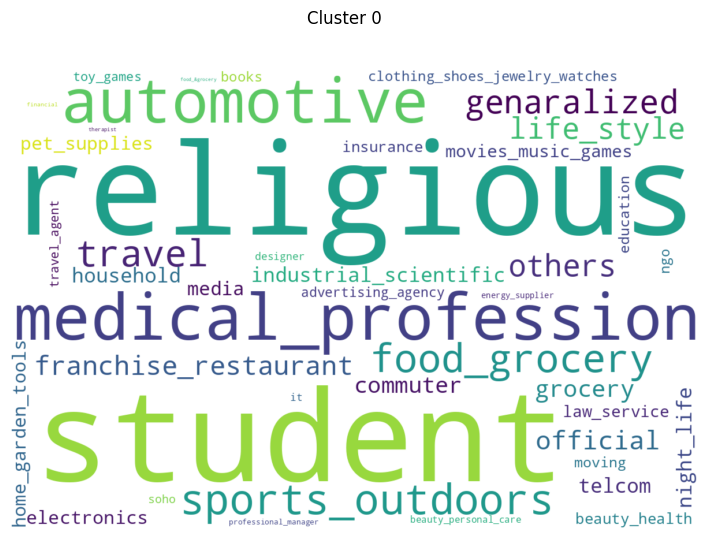

45


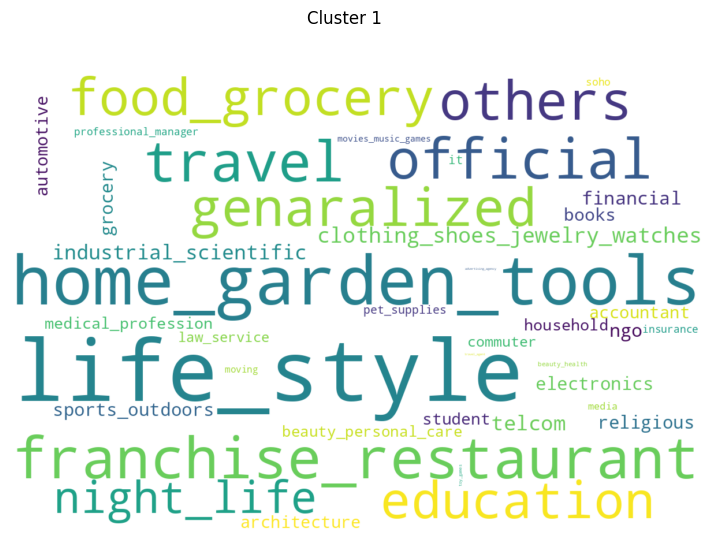

45


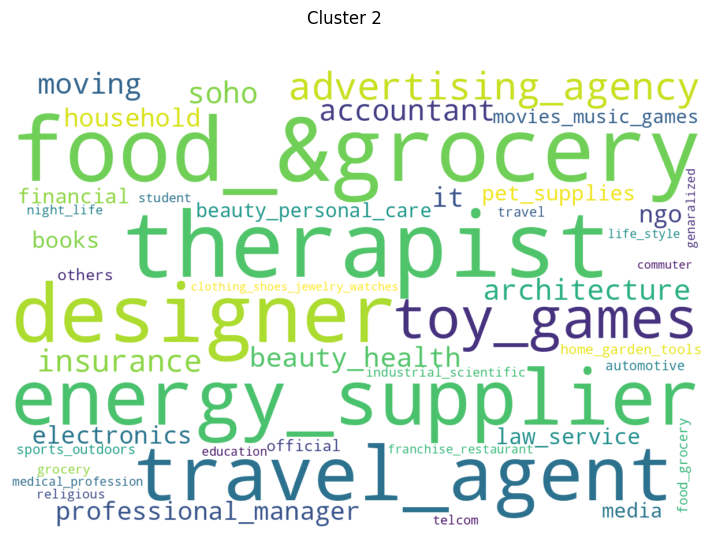

In [108]:
def generate_wordclouds(X, in_X_tfidf, k, in_word_positions):
    # Clustering
    in_model = KMeans(n_clusters=k, random_state=42)
    in_y_pred = in_model.fit_predict(X)
    in_cluster_ids = set(in_y_pred)
    silhouette_avg = silhouette_score(X, in_y_pred)
    print("For n_clusters =", k, "The average silhouette_score is :", silhouette_avg)

    # Number of words with highest tfidf score to display
    top_count = 50

    for in_cluster_id in in_cluster_ids:
        # compute the total tfidf for each term in the cluster
        in_tfidf = in_X_tfidf[in_y_pred == in_cluster_id]
        # numpy.matrix
        tfidf_sum = np.sum(in_tfidf, axis=0)
        # numpy.array of shape (1, X.shape[1])
        tfidf_sum = np.asarray(tfidf_sum).reshape(-1)
        top_indices = tfidf_sum.argsort()[-top_count:]
        term_weights = {in_word_positions[in_idx]: tfidf_sum[in_idx] for in_idx in top_indices}
        wc = WordCloud(width=1200, height=800, background_color="white")
        wordcloud = wc.generate_from_frequencies(term_weights)
        fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis("off")
        fig.suptitle(f"Cluster {in_cluster_id}")
        plt.show()

    return in_cluster_ids

_ = generate_wordclouds(pca_vectors, poi_count_array, 3, columns)


## Output file

In [ ]:
df.to_csv('../output/out.csv')

## Messy code

In [ ]:
# import matplotlib.pyplot as plt
# total = df['pca_label'].value_counts().values.sum()

# def fmt(x):
#     return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

# plt.pie(df['pca_label'].value_counts().values, labels=df['pca_label'].value_counts().index, autopct=fmt)

# sns.scatterplot(x='sport:basketball',y='building:civic',hue='pca_label',palette=sns.color_palette("hls",10),data=df,
#                legend="full")





# pca_df = pd.DataFrame(pca_vectors, columns=['pca1', 'pca2'])
# sns.scatterplot(x='pca1',y='pca2',palette=sns.color_palette("hls",10),data=pca_df,
#                legend="full")

# pca_df = pd.DataFrame(poi_to_pca_vector, columns=['pca1', 'pca2'])
# sns.scatterplot(x='pca1',y='pca2',palette=sns.color_palette("hls",10),data=pca_df,
#                legend="full")




# most_similar += [user_to_see]
similar = df[df.index.isin(most_similar)]
tmp = np.var(similar, axis=0)
# tmp[tmp> 100].sort_values(ascending=False)

# reverse_similar += [user_to_see]
not_most_similar =  df[df.index.isin(reverse_similar)]
tmp1 = np.var(not_most_similar, axis=0)
# tmp1[tmp1> 100].sort_values(ascending=False)

z = pd.DataFrame([tmp, tmp1]).T.head(100)
z = pd.DataFrame([tmp, tmp1]).T.sort_values(by= 0, ascending=False).head(100)

sns.lineplot(data= z, x= z.index, y= 0)
sns.lineplot(data= z, x= z.index, y= 1)